In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# interactive in the notebook
# %matplotlib notebook

# inlined but not interactive
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kohonen import load_data, som_step, standardize, de_standardize

### Initialisation

In [4]:
data, labels, target_digits = load_data()  # default name

Your digits:  [2 3 5 7]
Loading from binary...


In [5]:
# Standardise the data:
data, data_mean, data_std = standardize(data)

In [11]:
# Kohonen algorithm hyper-parameters
size_k = 6        # size of the Kohonen map (size_k, size_k)
sigma  = 2        # width of the gaussian neighborhood
eta    = 0.5      # learning rate
tmax   = 5000  # max iteration count; substitutes convergence criterion

# initialise the centers randomly
dim = data.shape[1]     # 28*28 = 784
data_range = 255.0
centers = np.random.rand(size_k**2, dim) * data_range

# build a neighborhood matrix
neighbor = np.arange(size_k**2).reshape((size_k, size_k))

# set the random order in which the datapoints should be presented
idxs_random = np.arange(tmax) % data.shape[0]
np.random.shuffle(idxs_random)

### Training and checking SOM difference at each epoch

In [12]:
maps = []
epoch = 500 # how often we check for convergence

for step, example_idx in enumerate(idxs_random):
    mov, win = som_step(centers, data[example_idx,:],neighbor,eta,sigma)
    if step % epoch == 0:
        maps.append(centers.copy())

In [30]:
map_diffs = []
for i in range(len(maps) - 1):
    map_diffs.append(np.sum(np.abs(maps[i+1] - maps[i])))

<IPython.core.display.Javascript object>


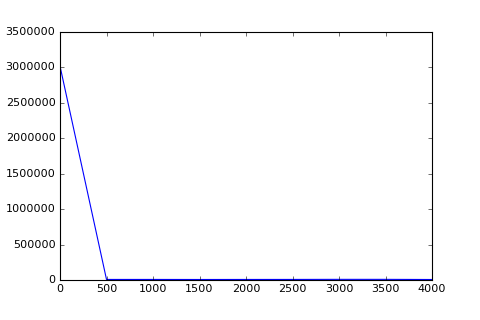

In [37]:
%matplotlib notebook
# plt.figure(figsize=(10,6))
plt.plot(np.arange(tmax-epoch, step=epoch), map_diffs)
plt.show()

### Training and checking total movement -- Doesn't work

In [18]:
movs = [] # movements created at each step
all_cs = []

for example_idx in idxs_random:
    mov, win = som_step(centers, data[example_idx,:],neighbor,eta,sigma)
    movs.append(mov)
    all_cs.append(centers.copy())

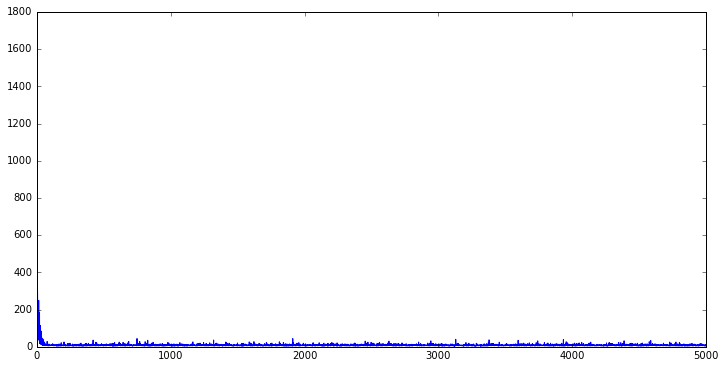

In [19]:
%matplotlib inline
plt.figure(figsize=(12,6))
# plt.plot(np.convolve(movs, np.ones(2000)/2000, mode='valid'))
# plt.plot(np.convolve(np.array(movs[::10]), np.ones(10)/2000, mode='valid'))
plt.plot(movs)

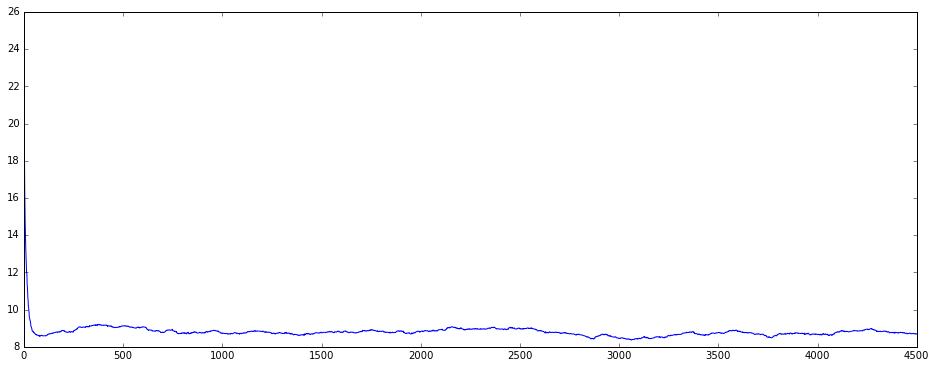

In [20]:
win_size = 500
smoothed1 = np.convolve(movs, np.ones(win_size)/win_size, mode='valid')
plt.figure(figsize=(16,6))
plt.plot(smoothed1)
# plt.plot(np.convolve(np.array(movs[::10]), np.ones(10)/2000, mode='valid'))
# plt.plot(movs[::10])

The double smoothing is used for when there is a lot of variation in the signal, usually for a very small learning rate

<IPython.core.display.Javascript object>


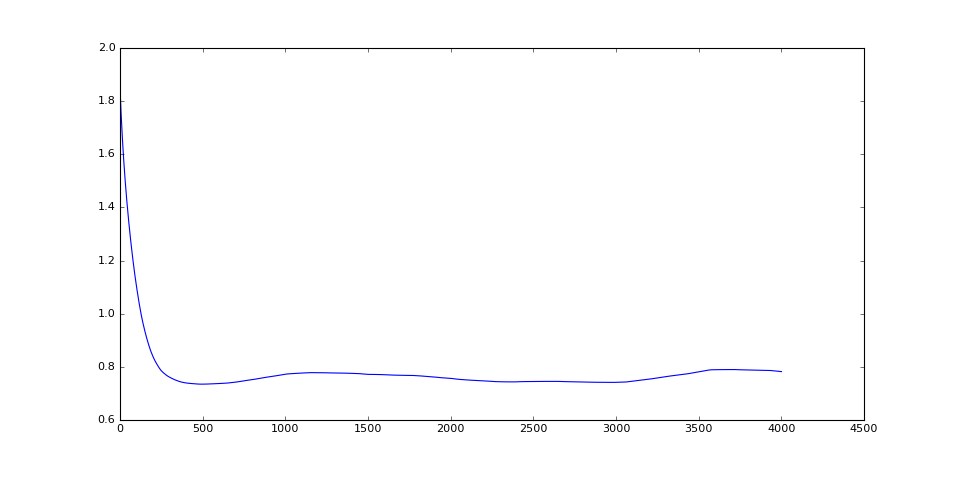

In [36]:
%matplotlib notebook
smoothed2 = np.convolve(smoothed1, np.ones(win_size)/win_size, mode='valid')
plt.figure(figsize=(12,6))
plt.plot(smoothed2)
plt.show()
# plt.plot(np.convolve(np.array(movs[::10]), np.ones(10)/2000, mode='valid'))
# plt.plot(movs[::10])

### Show the clusters

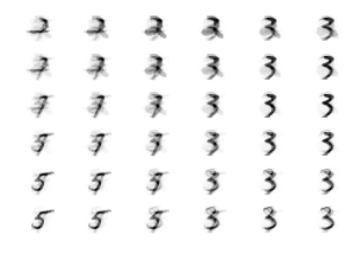

In [21]:
%matplotlib inline
for j in range(size_k ** 2):
    plt.subplot(size_k, size_k, j + 1)
    cs = de_standardize(all_cs[5000-1][j, :], data_mean, data_std)
    plt.imshow(np.reshape(cs, [28, 28]), cmap='Greys')
    plt.axis('off')
